# <span style="color:#0b486b">  FIT3181: Deep Learning (2022)</span>
***
*CE/Lecturer (Clayton):*  **Dr Trung Le** | trunglm@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Lim Chern Hong** | lim.chernhong@monash.edu <br/>  <br/>
*Tutor:*  **Mr Thanh Nguyen** \[Thanh.Nguyen4@monash.edu \] |**Mr Tuan Nguyen**  \[tuan.ng@monash.edu \] |**Mr Anh Bui** \[tuananh.bui@monash.edu\] | **Dr Binh Nguyen** \[binh.nguyen1@monash.edu \] | **Mr Md Mohaimenuzzaman** \[md.mohaimen@monash.edu \] |**Mr James Tong** \[james.tong1@monash.edu \]
<br/> <br/>
Faculty of Information Technology, Monash University, Australia
***

## <span style="color:#0b486b">Tutorial 02: Machine Learning Revisited</span>

The **purpose** of this tutorial is to revise the basic life-cycle of a machine learning project. It will focus on the following aspects:

1. A typical sequence of steps in designing a machine learning algorithm
2. How to implement these steps using open scikit-learn Python package
<br/>

**References and additional reading and resources**
- [An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting)

---

 ## <span style="color:#0b486b">I. Steps to a Build Machine Learning Model</span> <span style="color:red">**** (important)</span>

All machine learning applications start with data. As a ML scientist, a major part of your daily work is to look at the data and draw insights from them. Machine learning algorithms are the underlying tools and methods for you to draw such insights. In fact, beyond just being tools, *they provide us a framework to think, generate new ideas and new data products*. As we progress along this course, I hope you will start to build up such intuition.

One of the most important forms of these "insights" is the prediction power from the data. The rest of this tutorial will step you through a typical setting of building such a ML-based prediction model. 

Our ML problem in this tutorial is **face recognition**. This problem can be reduced into two sequential steps:

1. A collection of images is given, containing **40** different individuals. There are **10**  images for each individual. From this dataset, build a predictive model. which means 400 images

2. When a **new (unseen)** image is presented to the system, **recognize** the individual in this image.

Face-based identification systems are now being used around the world, most popularly at airports. When applying for a passport, photo of the applicant is taken. We can relate to this as step (1) where the system collects a database of face images to build the prediction model; and the authentication step at the airport is step (2). 

<img src="slide_images/02-prac02-1.jpg" width="400">

***However, a fixed and predefined dataset is all a data scientist has in advance, so how can we evaluate if our predictive model will perform well after it has been deployed, since we don't have access to unseen images/photos that the system will capture in the future?***

This scenario is encountered in most of the machine learning problems and this is one of the reasons that make modern data scientists different from traditional statistician's jobs.

To address this, a ML practitioner  will typically (randomly) split the given dataset $D$ into, what's called, the **training** dataset and **testing** dataset. We then use the training dataset to build the model, and then use the testing dataset, **as if the system has never seen it before**, to test how well the system will perform. 


This line of logics naturally tells us three essential steps to build a machine learning pipeline:

* **Step 1**. **Preparing your dataset in the form that is applicable to apply a machine leaning model** such as logistic regression, decision tree classifier and so forth. This usually also means that one might need to do necessary pre-processing steps (e.g., data cleaning) and then split the data into *training* and *testing* datasets. 
ME: we dont normally train the model using all the data, we separate into test-train partitions

* **Step 2 Model Selection**. **Select a suitable or a set of suitable machine learning models** for your problem at hand and train them using the **training dataset**. This step requires a deep understanding of machine learning models available to you, when it works and it doesn't work, what input is expected, what are its pitfalls, how to interpret its outputs and so on.

* **Step 3**. **Evaluate the performance of model** using the **testing dataset**.

This presents the most essential pipeline. In practice, we usually repeat these steps several times and have several additional substeps such as: formulating sensible features (**feature extraction**), selecting important features (**feature selection**), selecting optimal model or parameters (**model selection**).

ME: Feature selection: e.g. we have a 64 x 64 = 4096 pixels in an image, we do feature selection to select only relevant pixels that are important to the model

we will discuss a feature seleciton technique (PCA) later in the notebook.


---
### <span style="color:#0b486b">Step 1. Preparing your dataset: pre-processing, training and testing datasets</span>
To build a predictive model, a typical setting is to split the dataset into training and testing dataset.

**<span style="color:blue"> 1.1 First, we load the dataset using scikit-learn </span>**

In [32]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics


In [33]:
# When these datasets are loaded, they aren't loaded as NumPy arrays. They are of type Bunch. 
# A Bunch is a common data structure in Python. It's essentially a dictionary with the keys added to the object as attributes.

faces = datasets.fetch_olivetti_faces()

In [34]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [35]:
print(faces.keys())
print('data', type(faces['data']), faces['data'].shape)
print('images', type(faces['images']), faces['images'].shape)
print('target', type(faces['target']), faces['target'].shape)
print('DESCR', type(faces['DESCR']))
print(np.unique(faces['target']))

dict_keys(['data', 'images', 'target', 'DESCR'])
data <class 'numpy.ndarray'> (400, 4096)
images <class 'numpy.ndarray'> (400, 64, 64)
target <class 'numpy.ndarray'> (400,)
DESCR <class 'str'>
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


**<font color='blue'>Data Interpretation</font>** <br>
As we can see the faces dataset is a dictionary with 4 keys. 

- 'images' is a numpy array which contains 400 raw images. Each image has a size 64x64 pixels, 1 channel (gray value in range [0,1]).  
- 'data' is a numpy array which contains 400 extracted feature vectors. Each vector has a size 4096, represents for one specific image. In this dataset, the data is just a flatten vector of a 2D image. In traditional computer vision, instead of using the original raw images, we can use feature extractor to extract meaningful features from input images. For example, SIFT, SURF are two famous feature extractors. Refer more detail in the Wikipedia page https://en.wikipedia.org/wiki/Feature_(computer_vision)#Extraction.  
- 'target' is a numpy array which contains 400 label values. Each label is an integer number from 0 to 39, representing for the label index of each individual person in the dataset. 
- 'DESCR' is a data description

One of the first and most important things to do on a new project is to understand the dataset that we need to work on. Next, we will try to display some samples and their labels to get some sense of the dataset.

In [36]:
# this function is a utility to face images from the dataset
def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(30,30))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # show label in the left corner of an image 
        p.text(0, 14, str(label[i]), color='red', fontsize=18)
        p.text(0, 60, str(i))
    fig.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_21536\3188797615.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


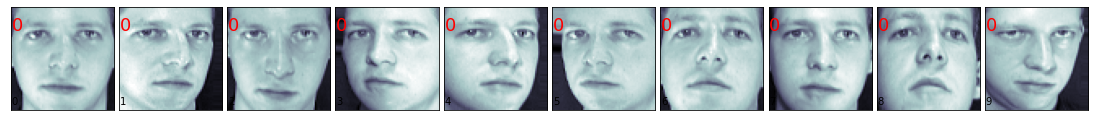

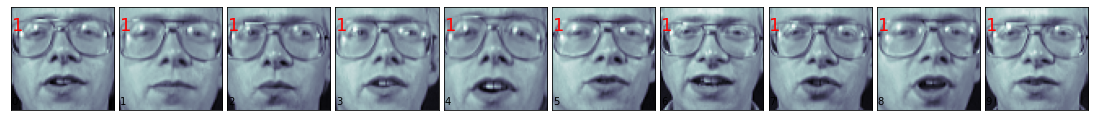

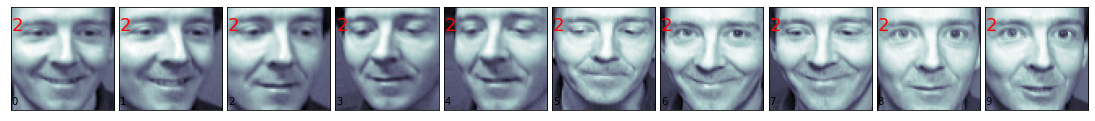

In [37]:
# display the first 30 images
display_faces(faces.images, faces.target, 10) # first person, label 0
display_faces(faces.images[10:20], faces.target[10:20], 10) # second, label 1 
display_faces(faces.images[20:30], faces.target[20:30], 10) # third, label 2 

In [38]:
# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

In [39]:
# number of class labels
n_classes = len(np.unique(y))
print(n_classes)

40


**<span style="color:blue"> 1.2 Next, we perform a pre-processing step to transform feature.</span>** In this case we use **principal component analysis (PCA)** to perform a **dimenentionality reduction** step, which is extremely useful when dealing with high-dimentional data as typically encountered in modern data science problem.

PCA 
tries to extract the relevant attributes.

<img src="./slide_images/note.gif" width="50" align="left"></img> *If you are unfamiliar with PCA, it is highly recommended that you should learn and know how to apply it to your tasks. PCA involves *singular value decomposition* technique from linear algebra, which might appears somewhat complicated. From a practical point of view, it is sufficient to know that it can be used to reduce continuous-valued feature vectors in high-dimensional space to low-dimensional spaces. You can find an explanation for PCA in almost any data analysis, machine learning or AI text books. Its wikipedia entry can be found [here](https://en.wikipedia.org/wiki/Principal_component_analysis).*

In [40]:
# this steps further pre-process the features by performing a dimentionality reduction step via PCA.
# n_components is the number of dimensions of feature vectors 
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)  # the parameter is the number of components
# e.g. we have a total of 4096 components in the image, we can choose n number of components
# e.g. 4000 components might not work, because it is computationally intesive to calcualte some eigenvector

print(pca)

PCA(n_components=10)


We use PCA to reduce the original $4,096$ dimensions to $10$ dimensions.

In [41]:
pca_X = pca.fit_transform(X)
# ME: the more components we hae, the larger the computational power required
# ME: we can keep trying to find the optimal number of components , the trade-off is performance vs accuracy


In [42]:
pca.explained_variance_ratio_


array([0.2381273 , 0.13993974, 0.0796861 , 0.04998328, 0.03609851,
       0.03156933, 0.02426831, 0.02036397, 0.01958114, 0.01672117],
      dtype=float32)

**<span style="color:blue"> 1.3 Next, since our problem is a prediction problem, a typical setup is to split the whole dataset into **training** and **testing** sets.</span>**.

With sciki-learn, we can do this step using [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [`StratifiedShuffleSplit`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html).

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train_X, test_X, train_y, test_y = train_test_split(pca_X, y, test_size = 0.3, random_state=2)
# ME: we can do stratify = y , to include all 40 individuals

# ME: splits the dataset into train and test partitions
# pca_x is after applying PCA transformation of x
# test_size = 30% of dataset
# random_state is a seed

In [45]:
# ME: recap, we had 400 images, now training has 280 and testing has 120 
# IMPORTANT: how to know what is the best train-test ratio? we use empirical testing, 
# visualize this in terms of a graph (ratio of test vs train) , we have concluded that 30 to 70 is best

print("Number of training samples:\t" + str(len(train_X)))
print("Number of testing samples:\t" + str(len(test_X)))

Number of training samples:	280
Number of testing samples:	120


---
### <span style="color:#0b486b">Step 2. Choose one or more suitable machine learing models for your task.</span>

At this step, we need to select a suitable or a set of suitable machine learning models for your problem at hand and train them using the **training dataset**. 

<img src="slide_images/note.gif" width="40" align="left">This step requires deep understanding of machine learning models avaiable to you, when it works and it doesn't work, what input is expected, what are its pitfalls, how to intepret its outputs and so on. This [**scikit-learn cheat sheet**](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), for example, is a great place to start.

In this tutorial, we will *logisticRegression* implemented in scikit-learn as the prediction model. Its description can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

**<span style="color:blue">2.1 Choose a sensible prediction model.</span>**

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# create a logistic regression
logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

**<span style="color:blue">2.2 Now we train the model using *training dataset*.</span>**

In [48]:
# train model
train_model = logistic.fit(train_X, train_y) # pass in training data and label

In [49]:
print(train_model.coef_.shape)
print(train_model.coef_)

(40, 10)
[[-2.49698389e-01  9.31973908e-02  1.05833570e-01  5.84081106e-01
   5.64106236e-01 -3.60855090e-01 -3.63056872e-02 -1.52341614e+00
  -7.57510420e-02  3.66157205e-01]
 [-7.51178331e-02 -1.59359821e-01 -4.50366433e-01 -1.48533166e-01
   3.57732592e-01 -2.63334222e-01 -8.41843231e-01 -7.22267552e-01
  -7.02224590e-01  5.14701299e-02]
 [ 0.00000000e+00  0.00000000e+00  3.93266290e-01 -1.64939893e-01
   9.72432527e-03 -7.79802740e-02 -4.09676448e-01  1.00519457e+00
   2.00114404e-01 -1.24212211e+00]
 [-1.15564910e-01 -1.52437523e-01  0.00000000e+00  0.00000000e+00
   1.77382787e-01  2.08459317e-01 -8.77973062e-01  2.37203047e-01
   0.00000000e+00  3.67484451e-02]
 [-9.42989348e-02  2.72984891e-01  2.84033868e-01  1.29866666e-01
  -9.69839426e-01 -2.97095595e-01  1.33988140e-01 -3.57399903e-01
  -4.33965232e-01 -5.01871031e-01]
 [-5.12309913e-01 -4.37171522e-02  0.00000000e+00  3.08628420e-01
  -8.40928409e-01 -2.38950135e-01 -7.98536476e-01  0.00000000e+00
   0.00000000e+00  0.000

---
### <span style="color:#0b486b">Step 3. Assessing the model performance using *testing dataset*.</span>

**<span style="color:blue">3.1 Use the trained model to predict newly unseen data samples in the testing datasets.</span>**

In [50]:
# perform prediction on the newly, unseen, test data.
pred_results = train_model.decision_function(test_X)

In [51]:
# examine what was returned
# ME: 120 images in testing and 40 individuals ; RECAP: we had 40 indiviudlas and each of the had 10 images
# trying to predict which 40 individuals these 120 images belong to

print(pred_results.shape) 

print(pred_results)  
# we can interpret the results
# every single row is the result for every test data
# 

(120, 40)
[[-5.96930896 -9.13789189 -3.43607956 ... -3.95941675 -8.04285198
  -0.51920477]
 [-6.97265402 -4.53475726 -4.39254538 ... -5.03050369 -9.58831153
  -4.01676013]
 [-6.03494356 -8.11287783 -6.63930929 ... -7.00288764 -5.82914965
  -7.59684836]
 ...
 [-6.06486677 -7.88884189 -2.00980943 ... -1.16731439 -5.93242032
  -6.1887681 ]
 [-5.29060273 -6.50757862 -2.79134059 ... -2.66711644 -8.01227294
  -4.59889459]
 [-2.32278377  0.7945143  -8.31831573 ... -6.59386662 -9.95859925
  -6.28563694]]


In [52]:
# LogisticRegression model implemeted in scikit-learn package employs a one-versus all strategy 
# for multilabel classification problem returns a array of log-likelihood prediction for each label
# Here, we need to use the argmax function to return the most likely predictive label.

# ME: use argmax to select the max, the best one
pred_labels = [np.argmax(pred_results[i]) for i in range(len(pred_results))]

In [53]:
# print the first few predicted labels to gain a sense of how the model is performing
# ME: predicted labels for the first 10 data
print(pred_labels[0:10])

[9, 4, 22, 23, 35, 2, 6, 18, 30, 8]


In [54]:
# print the first few prediction against the true labels
for i in range(120):
    print("true label " + str(test_y[i]) + " is predicted as " + str(pred_labels[i]))

true label 9 is predicted as 9
true label 3 is predicted as 4
true label 22 is predicted as 22
true label 15 is predicted as 23
true label 35 is predicted as 35
true label 2 is predicted as 2
true label 6 is predicted as 6
true label 18 is predicted as 18
true label 30 is predicted as 30
true label 22 is predicted as 8
true label 17 is predicted as 17
true label 7 is predicted as 7
true label 18 is predicted as 18
true label 29 is predicted as 29
true label 14 is predicted as 14
true label 18 is predicted as 10
true label 19 is predicted as 19
true label 39 is predicted as 12
true label 34 is predicted as 34
true label 0 is predicted as 0
true label 28 is predicted as 28
true label 39 is predicted as 39
true label 8 is predicted as 8
true label 39 is predicted as 39
true label 7 is predicted as 7
true label 31 is predicted as 31
true label 2 is predicted as 2
true label 23 is predicted as 23
true label 38 is predicted as 28
true label 16 is predicted as 16
true label 5 is predicted as 

**<span style="color:blue">3.2 Generate a report against model assessment and performance metrics.</span>**
The performance metrics can be different depending on the task at hand. Typically, it falls into either a **classification** or **regression** problems. 

Our current is face recognition, hence it is a classification problem. To assess the performance of a classification problem, important metrics include: **precision**, **recall**, **accuracy**  and **F-score** which can be derived from the **confusion_matrix**.

The following figure from [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall) clearly shows how the above metrics (highlighted with blue rectangles) are computed from the confusion matrix.
<img src="slide_images/precision.png" width="1200">

Besides the above common ones, there are also other metrics for performance evaluation as shown in the figure. Scikit-learn has provided several pre-implementated modules to compute these metrics, which can be founded [here](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

In [55]:
# print out the confusion matrix
# np.set_printoptions(threshold=np.inf)   # this is optional, to inspect the whole confusion matrix
print(metrics.confusion_matrix(pred_labels, test_y))

# there are 40 individuals in total , each individual image sample has 10 features
print(len(metrics.confusion_matrix(pred_labels, test_y)))  


[[2 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
39


In [56]:
# np.unique(y)
np.unique(test_y)  # one less than the oriignal 40 individuals, 
# ME: that 1 individual was left out during train-test split
# ME: sometimes not a good thing, we should try our best to include every single individual

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [57]:
np.unique(pred_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39], dtype=int64)

In [64]:
# print out the classification report
target_names=["person " + str(i) for i in range(len(np.unique(pred_labels)))]
# print(metrics.classification_report(pred_labels, test_y, target_names=target_names))
print(metrics.classification_report(test_y, pred_labels, target_names = target_names))

# ME:
# macro avg does not consider support but just calculate the
# support indicates how many images were used in test set for a specific individual
# weighted avg considers support into its calculatio of average

              precision    recall  f1-score   support

    person 0       1.00      0.67      0.80         3
    person 1       1.00      1.00      1.00         4
    person 2       1.00      0.60      0.75         5
    person 3       0.50      0.33      0.40         3
    person 4       0.00      0.00      0.00         1
    person 5       1.00      1.00      1.00         2
    person 6       0.67      0.40      0.50         5
    person 7       1.00      1.00      1.00         2
    person 8       0.50      1.00      0.67         1
    person 9       0.33      0.50      0.40         2
   person 10       0.60      1.00      0.75         3
   person 11       1.00      1.00      1.00         2
   person 12       0.33      0.50      0.40         2
   person 13       1.00      1.00      1.00         1
   person 14       1.00      1.00      1.00         4
   person 15       0.67      0.67      0.67         3
   person 16       1.00      1.00      1.00         2
   person 17       1.00    

## <span style="color:#0b486b">II. Summary </span>
Up to now, you should understand the general principle as well concrete steps to build a typical machine learning model. Given a training dataset, these main steps can be summarized as follows:

* **<span style="color:#0b486b"> Step 1. Preparing your dataset: pre-processing, training and testing datasets</span>**
    * 1.1 load the dataset
    * 1.2 perform necessary feature pro-processing steps.
    * 1.3 construct the training and testing sets. A typical spliting proportion is 70% for training and 30% for testing.
* **<span style="color:#0b486b">Step 2. Choose a suitable machine learning model for your problem at hand.</span>**
    * 2.1 Pick a sensible model and initialize it
    * 2.2 Train this model using **training** set
* **<span style="color:#0b486b">Step 3. Assess the performance of your modelling choice using **testing** dataset.</span>**
    * 3.1 Use trained model to predict newly and unseen data samples from **testing** dataset.
    * 3.2 Produce a performance report against model assessment metrics depending on which type of machine learning problems you are working with (e.g., classification or regression).

## <span style="color:#0b486b">III. Put It All Together</span> <span style="color:red">**** (important)</span>
Follow the summary above and put all above code segments together we end up the following piece of codes for our face detection problem.

<img src="slide_images/note.gif" width="40" align="left"></img>*Before proceeding to execute the following codes, you might want to start from everything from scatch. One way to do this is to **restart the kernel** by **pressing the digit '0' twice** from your keyboard.*

In [59]:
# this function is a utility to face images from the dataset
def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

In [60]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

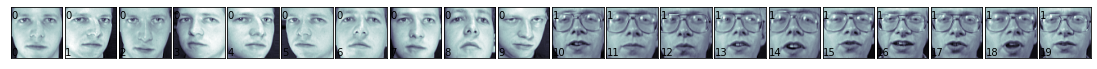

In [61]:
# load face datasets
faces = datasets.fetch_olivetti_faces()

# display the first 20 images
display_faces(faces.images, faces.target, 20)

# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

# number of class labels
n_classes = len(np.unique(y))

# this steps further pre-process the features by performing a dimentionality reduction step via PCA.
pca = decomposition.PCA(n_components=10)
pca_X = pca.fit_transform(X)

# split into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(pca_X, y, test_size = 0.3, random_state=2)

In [62]:
# create a logistic regression
logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

# train model
train_model = logistic.fit(train_X, train_y)

# perform prediction on the newly, unseen, test data.
pred_results = train_model.decision_function(test_X)

# LogisticRegression model implemeted in scikit-learn package employs a one-versus all strategy 
# for multilabel classification problem returns a array of log-likelihood prediction for each label
# Here, we need to use the argmax function to return the most likely predictive label.
pred_labels = [np.argmax(pred_results[i]) for i in range(len(pred_results))]

# print out the classification report
target_names=["person " + str(i) for i in range(len(np.unique(pred_labels)))]
print(metrics.classification_report(pred_labels, test_y, target_names=target_names))

              precision    recall  f1-score   support

    person 0       0.67      1.00      0.80         2
    person 1       1.00      1.00      1.00         4
    person 2       0.60      1.00      0.75         3
    person 3       0.33      0.50      0.40         2
    person 4       0.00      0.00      0.00         1
    person 5       1.00      1.00      1.00         2
    person 6       0.40      0.67      0.50         3
    person 7       1.00      1.00      1.00         2
    person 8       1.00      0.50      0.67         2
    person 9       0.50      0.33      0.40         3
   person 10       1.00      0.60      0.75         5
   person 11       1.00      1.00      1.00         2
   person 12       0.50      0.33      0.40         3
   person 13       1.00      1.00      1.00         1
   person 14       1.00      1.00      1.00         4
   person 15       0.67      0.67      0.67         3
   person 16       1.00      1.00      1.00         2
   person 17       1.00    

## <span style="color:#0b486b">IV. Automate Machine Learning Pipline</span> <span style="color:red">*** (encouraging)</span>
Scikit-learn provides a Pipeline utility to help automate machine learning pipeline which executes a linear sequence of data transformation and model fitting to be chained together. The following code summarizes and packs above steps into a machine learning pipeline for our face detection problem.

Cross-validation is a common technique to find an better hyper-parameter that can achieve better performance on the test set. Generally, a training set has been split into k equal folds. We then repeatedly pick one fold as a validation set and the rest k-1 folds as a training set to train model. The average performance over k validation folds is used as the final performance (i.e., the cross-validation accuracy) to chose hyper-parameter. In this example, we use the *cross_val_score* function in Scikit-learn to finetune the number of components *n_components* in PCA.   

More detail can be found in this link https://scikit-learn.org/stable/modules/cross_validation.html

[0.8625 0.9125 0.8875 0.825  0.8125]
n_components=10, cross_validate_result=0.86
[0.9125 0.9375 0.875  0.9625 0.9   ]
n_components=20, cross_validate_result=0.9175000000000001
[0.95   0.9875 0.975  0.9625 0.9375]
n_components=30, cross_validate_result=0.9625
[0.9625 0.9125 0.975  0.8875 0.975 ]
n_components=40, cross_validate_result=0.9424999999999999
[0.925  0.925  0.9625 0.95   0.9625]
n_components=50, cross_validate_result=0.9450000000000001
[0.95   0.95   0.9625 0.9125 0.9125]
n_components=60, cross_validate_result=0.9375
[0.975  0.9375 0.95   0.95   0.975 ]
n_components=70, cross_validate_result=0.9574999999999999
[0.9   0.975 0.975 0.925 0.975]
n_components=80, cross_validate_result=0.95
[0.95   0.9625 0.9625 0.9375 0.9375]
n_components=90, cross_validate_result=0.95
[0.975  0.975  0.95   0.9375 0.975 ]
n_components=100, cross_validate_result=0.9625


Text(0, 0.5, 'cv_results')

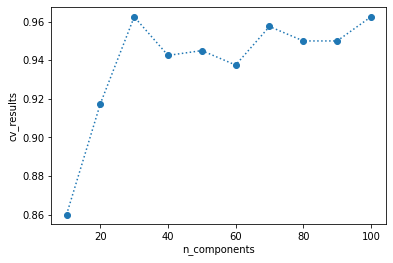

In [63]:
from sklearn import datasets
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


# load face datasets
faces = datasets.fetch_olivetti_faces()

# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

list_n_components = [10,20,30,40,50,60,70,80,90,100]

all_results = []

for n_components in list_n_components:
    # create pipeline
    estimators = []  # appends what we want to do in the pipeline
    estimators.append(('pca', decomposition.PCA(n_components=n_components)))
    estimators.append(('logistic', LogisticRegression(penalty='l1', solver='liblinear')))
    model = Pipeline(estimators)

    # evaluate pipeline
    # ME: n_splits is how many equal-sized subsets we want, (e.g. 5 means 5 smaller subsets)
    # ME: test_size is ratio of testing data in terms of total dataset
    # MEL this is called K-fold, there is also another strategy called leave-one-out, normally for small datasets
    # where there is a fixed number of iterations, and you do 1:99 test to train data 
    kfold = StratifiedShuffleSplit(n_splits=5,test_size = 0.2) # split into training and testing sets with n_splits times.

    results = cross_val_score(model, X, y, cv=kfold) # run the model with n_splits datasets and evaluate output.

    print(results) # print accuracy for n_splits times of data
    print('n_components={}, cross_validate_result={}'.format(n_components, results.mean()))
    
    all_results.append(results.mean())

plt.figure()
plt.plot(list_n_components, all_results, 'o',linestyle = ':')
plt.xlabel('n_components')
plt.ylabel('cv_results')

we can visualize the number of components to cv_results, at 40 num of components, we have 94% accuracy

## <span style="color:#0b486b">V. Practical Coding Exercises</span>

1. In section III, what is the performance if we don't perform the dimensionality reduction step? Will the precision of the face recognition problem increase or decrease? Use the above codes as the template, write your own codes to demonstrate this.
2. Learning the lesson from step (1) above, vary the dimensionality in {2, 5, 10, 15, and 20} (e.g., the parameter `n_components`). Which number of components give the best results?
3. Logistic regression is not the best predictive model choice for this problem. Read the description for the Support Vector Machines (SVM) from scikit-learn [here](http://scikit-learn.org/stable/modules/svm.html). What is the performance now if the classifier is SVM instead of LogisticRegression?. 

---
### <div  style="text-align:center">**THE END**</div>